# Data Augmentation Exercise
---
## 데이터가 더 부족한 세상으로!

[여기 참고](https://www.cs.toronto.edu/~kriz/cifar.html)

## Data Loading

In [1]:
from tensorflow.keras.datasets.cifar100 import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

169001437/169001437 [==============================] - 7s 0us/step


In [3]:
import random
import matplotlib.pyplot as plt

이미지 인덱스 : [70]


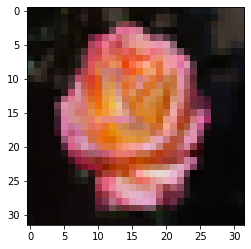

In [4]:
### 반복실행
idx = random.randint(0,49999)
print(f"이미지 인덱스 : {y_train[idx]}")
plt.imshow(x_train[idx])
plt.show()

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

## Validation set 생성

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3) 

## X : Min-Max Scaling

In [7]:
x_train = x_train/x_train.max()
x_test = x_test/x_train.max()

In [8]:
x_val = x_val/x_train.max()

## Y : One-Hot Encoding

In [9]:
from tensorflow.keras.utils import to_categorical
import numpy as np
u = len(np.unique(y_train))
y_train = to_categorical(y_train,u)


In [10]:
y_val = to_categorical(y_val,u)

## **Data Augmentation**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
idj = ImageDataGenerator(rotation_range = 20,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.1,
                         shear_range=0.1,
                         horizontal_flip=True,
                         vertical_flip=True)

# from tensoflow.keras.preprocessing.image import ImageDataGenerator
# idj = ImageDataGenerator(rotation_range=20,
#                          weigh_shift_range=0.1,
#                          height_shift_range=0.1,
#                          zoom_range=0.1
#                          ,shear_range=0.1,
#                          horizontal_flip=True,
#                          vertical_flip=Ture)

In [13]:
idj.fit(x_train)

In [14]:
train_idj = idj.flow(x_train, y_train)

## Keras로 자유롭게 CNN 모델링

1. [이 구조를 미니 버전으로 활용해봐도 좋다](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
2. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.

In [15]:
x_train.shape, y_train.shape

((35000, 32, 32, 3), (35000, 100))

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
tf.keras.backend.clear_session()

il = Input(shape=(32,32,3))

hl = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(il)
hl = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(hl)
hl = MaxPool2D(pool_size=(2,2))(hl)
hl = BatchNormalization()(hl)

hl = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(il)
hl = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(hl)
hl = MaxPool2D(pool_size=(2,2))(hl)
hl = BatchNormalization()(hl)

hl = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(il)
hl = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(hl)
hl = MaxPool2D(pool_size=(2,2))(hl)
hl = BatchNormalization()(hl)

hl = Flatten()(hl)
hl = Dropout(0.2)(hl)
ol = Dense(100,activation='softmax')(hl)

model = tf.keras.models.Model(il, ol)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 8192)              0     

In [ ]:
tf.keras.backend.clear_session()

model = Sequential()

model.add( Input(shape=(32,32,3)) )

model.add( Conv2D(filters=64,
                  kernel_size=(3,3),
                  strides=(1,1),
                  padding='same',
                  activation='relu' ))
model.add( Conv2D(filters=64,
                  kernel_size=(3,3),
                  strides=(1,1),
                  padding='same',
                  activation='relu'))

model.add( MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D( filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))
model.add(Conv2D( filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D( filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))
model.add(Conv2D( filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add( MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

# model.add(Conv2D( filters=512,
#                  kernel_size=(3,3),
#                  strides=(1,1),
#                  padding='same',
#                  activation='relu'))
# model.add(Conv2D( filters=512,
#                  kernel_size=(3,3),
#                  strides=(1,1),
#                  padding='same',
#                  activation='relu'))

# model.add( MaxPool2D(pool_size=(2,2)))
# model.add(BatchNormalization())

# model.add(Conv2D( filters=512,
#                  kernel_size=(3,3),
#                  strides=(1,1),
#                  padding='same',
#                  activation='relu'))
# model.add(Conv2D( filters=512,
#                  kernel_size=(3,3),
#                  strides=(1,1),
#                  padding='same',
#                  activation='relu'))

# model.add( MaxPool2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(100, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

## Early Stopping을 이용한 학습

- 8 epoch 연속으로 val_loss가 개선되지 않았으면 멈추는 얼리스토핑 모델을 만드시오.

In [18]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
hist = model.fit(train_idj, validation_data=(x_val,y_val), verbose=1, epochs=1000, callbacks=[es])

Epoch 1/1000
1094/1094 [==============================] - 39s 25ms/step - loss: 4.0064 - val_loss: 1340.3267
Epoch 2/1000
1094/1094 [==============================] - 27s 25ms/step - loss: 3.6229 - val_loss: 1327.3887
Epoch 3/1000
1094/1094 [==============================] - 35s 32ms/step - loss: 3.4914 - val_loss: 1286.2488
Epoch 4/1000
1094/1094 [==============================] - 27s 25ms/step - loss: 3.4114 - val_loss: 1041.4980
Epoch 5/1000
1094/1094 [==============================] - 36s 33ms/step - loss: 3.3543 - val_loss: 1096.6826
Epoch 6/1000
1094/1094 [==============================] - 37s 34ms/step - loss: 3.3203 - val_loss: 1147.9758
Epoch 7/1000
1094/1094 [==============================] - 38s 35ms/step - loss: 3.2853 - val_loss: 1150.2631
Epoch 8/1000
1094/1094 [==============================] - 25s 23ms/step - loss: 3.2531 - val_loss: 1176.7881
Epoch 9/1000
1094/1094 [==============================] - 25s 23ms/step - loss: 3.2277 - val_loss: 1033.2466
Epoch 10/1000
1094/

* 예측값 생성 및 구조 변경

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
single_y_pred = y_pred.argmax(axis=1)


In [ ]:
single_y_test = y_test.argmax(axis=1)

* 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
test_acc = accuracy_score(single_y_test, single_y_pred)

In [ ]:

print(f'테스트셋 정확도 : {test_acc*100}%')

테스트셋 정확도 : 0.0%


## 이미지 시각화

In [ ]:
import random as rd

In [ ]:
# np.floor(y_pred[rand_n]*100)

* 반복 실행하여 확인해봅시다.

id : 5803
실제 카테고리 인덱스 : 30
모델의 카테고리 인덱스 예측 : 6
오답
모델의 카테고리별 확률 : 
[ 0.  0.  0.  0.  0.  0. 71.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 28.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]%


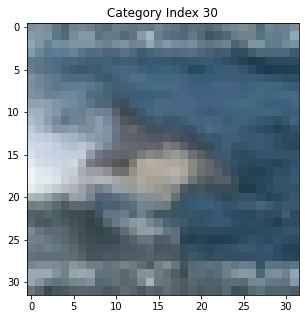

In [ ]:
rand_n = rd.randrange(0, single_y_test.shape[0])

print(f'id : {rand_n}')
print(f'실제 카테고리 인덱스 : {single_y_test[rand_n]}')
print(f'모델의 카테고리 인덱스 예측 : {single_y_pred[rand_n]}')

if single_y_test[rand_n] == single_y_pred[rand_n] :
    print('정답')
else :
    print('오답')

print('======================================')
print(f'모델의 카테고리별 확률 : \n{np.floor(y_pred[rand_n]*100)}%')
print('======================================')

plt.figure(figsize=(5,5))
plt.title(f'Category Index {single_y_test[rand_n]}')
plt.imshow(x_test[rand_n].reshape(32,32,3))
plt.show()

* 틀린 것만 확인해봅시다.

id : 8673
실제 카테고리 인덱스 : 27
모델의 카테고리 인덱스 예측 : 45
오답
모델의 카테고리별 확률 : 
[ 0.  0.  0.  0.  0.  0. 71.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 28.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]%


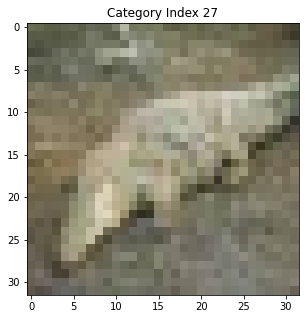

In [ ]:
y_tf = single_y_pred==single_y_test
false_idx = np.where(y_tf==False)[0]
false_len = len(false_idx)

idx = false_idx[rd.randrange(0, false_len)]

print(f'id : {idx}')
print(f'실제 카테고리 인덱스 : {single_y_test[idx]}')
print(f'모델의 카테고리 인덱스 예측 : {single_y_pred[idx]}')

if single_y_test[idx] == single_y_pred[idx] :
    print('정답')
else :
    print('오답')

print('======================================')
print(f'모델의 카테고리별 확률 : \n{np.floor(y_pred[rand_n]*100)}%')
print('======================================')

plt.figure(figsize=(5,5))
plt.title(f'Category Index {single_y_test[idx]}')
plt.imshow(x_test[idx].reshape(32,32,3))
plt.show()